<a href="https://colab.research.google.com/github/ozlemizgi/data_heartmedical/blob/main/heart7_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Kütüphanelerin Çağırılması
import numpy as np
import pandas as pd

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
features = ["id" , "age" , "gender", "impluse" , "pressurehight" , "pressurelow" , "glucose" , "kcm" , "troponin" , "class"]

heart = pd.read_csv("https://raw.githubusercontent.com/ozlemizgi/data_heartmedical/main/csv_result-Medicaldataset.csv", names= features, header=0)
heart.sample(9)

,id,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
1089,1090,27,0,93,119,63,137.0,6.74,0.003,positive
745,746,44,1,60,175,88,99.0,1.59,0.003,negative
1210,1211,58,0,84,128,80,202.0,3.18,0.011,negative
1007,1008,40,1,73,114,68,90.0,1.40,0.022,positive
1069,1070,32,0,1111,141,95,82.0,2.66,0.008,negative
412,413,65,1,63,150,95,122.0,6.90,0.988,positive
641,642,60,0,64,119,73,100.0,1.37,0.031,positive
1303,1304,55,0,80,117,83,200.0,0.78,0.052,positive
357,358,55,0,61,128,49,78.0,1.98,0.019,positive


In [21]:
F1 = np.random.normal(loc=3,scale=10,size=10)
F1

array([ 16.50134139,  -3.94432888, -25.40316322,  -5.72505052,
         2.42037532,  -5.97641747,  -8.93525163,   7.30281854,
        19.63766606,   0.96801162])

In [22]:
F1 = np.random.normal(loc=3,scale=0.2,size=15) 
F2 = np.random.normal(loc=5,scale=1,size=15)
F3 = np.random.normal(loc=-2,scale=3,size=15)
F4 = np.random.normal(loc=8,scale=2,size=15)
F5 = np.random.normal(loc=25,scale=3.5,size=15)
F6 = np.random.normal(loc=1,scale=5,size=15)
F7 = np.random.normal(loc=9,scale=1,size=15)

heart = pd.DataFrame({"F1":F1, "F2":F2, "F3":F3, "F4":F4, "F5":F5, "F6":F6, "F7":F7}) 
heart

,F1,F2,F3,F4,F5,F6,F7
0,3.061402,4.631124,-1.954336,9.176435,24.431798,-4.480935,9.106109
1,3.188955,4.044687,-4.347688,8.420561,28.966047,4.062049,9.316300
2,2.704987,4.581200,0.571710,11.002875,26.253363,2.979449,7.879930
3,2.976890,3.319588,-2.177023,5.787033,26.111847,-4.513785,10.788376
4,3.233653,5.072986,-0.619644,6.920616,23.479072,5.391434,9.425628
5,2.981225,5.408574,-5.260866,10.349787,32.164940,5.464361,8.378622
6,2.801746,7.499639,-2.398662,4.821899,23.849036,-0.528643,9.056391
7,2.547294,5.867989,-6.187927,10.383519,19.737203,-4.831624,10.171340
8,3.363050,4.371547,-1.378807,10.825708,27.284973,-5.175429,8.939491
9,3.095467,4.942029,0.791974,11.217890,19.285387,-7.470328,8.775362


In [23]:
describtion = heart.describe().T
describtion

,count,mean,std,min,25%,50%,75%,max
F1,15.0,2.996112,0.227776,2.547294,2.884095,3.061402,3.142213,3.363050
F2,15.0,4.905504,1.000172,3.319588,4.476374,4.942029,5.233376,7.499639
F3,15.0,-2.517706,2.041798,-6.187927,-4.096684,-2.177023,-1.338194,0.791974
F4,15.0,8.342659,2.414461,3.197057,6.754572,8.844154,10.366653,11.217890
F5,15.0,24.674623,3.393208,19.285387,22.719692,24.165738,26.574217,32.164940
F6,15.0,-0.837714,4.685163,-7.470328,-4.497360,-1.714116,3.520749,7.095173
F7,15.0,9.299668,0.768906,7.879930,8.943179,9.106109,9.798484,10.788376


In [24]:
describtion["std"]*describtion["std"]

F1     0.051882
F2     1.000343
F3     4.168939
F4     5.829620
F5    11.513860
F6    21.950755
F7     0.591217
Name: std, dtype: float64

In [25]:
Variance_Threshold_FS = VarianceThreshold(threshold=1)
Variance_Threshold_FS.fit(heart)

VarianceThreshold(threshold=1)

In [26]:
Variance_Threshold_FS.get_support()

array([False, False,  True,  True,  True,  True, False])

In [27]:
heart.columns[Variance_Threshold_FS.get_support()]

Index(['F3', 'F4', 'F5', 'F6'], dtype='object')

In [29]:
constant_columns = [column for column in heart.columns
                    if column not in heart.columns[Variance_Threshold_FS.get_support()]]

print(len(constant_columns))

3


In [30]:
for feature in constant_columns:
     print(feature)

F1
F2
F7


In [31]:
Variance_Threshold_data = heart.drop(constant_columns,axis=1)
Variance_Threshold_data

,F3,F4,F5,F6
0,-1.954336,9.176435,24.431798,-4.480935
1,-4.347688,8.420561,28.966047,4.062049
2,0.571710,11.002875,26.253363,2.979449
3,-2.177023,5.787033,26.111847,-4.513785
4,-0.619644,6.920616,23.479072,5.391434
5,-5.260866,10.349787,32.164940,5.464361
6,-2.398662,4.821899,23.849036,-0.528643
7,-6.187927,10.383519,19.737203,-4.831624
8,-1.378807,10.825708,27.284973,-5.175429
9,0.791974,11.217890,19.285387,-7.470328


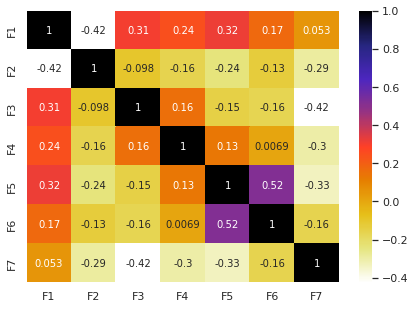

In [32]:
plt.figure(figsize=(7,5))
cor = heart.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [33]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [34]:
corr_features = correlation(heart, 0.5)
len(set(corr_features))

1

In [35]:
corr_features

{'F6'}

In [36]:
Correlation_Coefficient_data = heart.drop(corr_features,axis=1)
Correlation_Coefficient_data

,F1,F2,F3,F4,F5,F7
0,3.061402,4.631124,-1.954336,9.176435,24.431798,9.106109
1,3.188955,4.044687,-4.347688,8.420561,28.966047,9.316300
2,2.704987,4.581200,0.571710,11.002875,26.253363,7.879930
3,2.976890,3.319588,-2.177023,5.787033,26.111847,10.788376
4,3.233653,5.072986,-0.619644,6.920616,23.479072,9.425628
5,2.981225,5.408574,-5.260866,10.349787,32.164940,8.378622
6,2.801746,7.499639,-2.398662,4.821899,23.849036,9.056391
7,2.547294,5.867989,-6.187927,10.383519,19.737203,10.171340
8,3.363050,4.371547,-1.378807,10.825708,27.284973,8.939491
9,3.095467,4.942029,0.791974,11.217890,19.285387,8.775362


In [38]:
F1 = np.random.normal(loc=50,scale=2,size=10) 
F2 = np.random.normal(loc=5,scale=1,size=10)
F3 = np.random.normal(loc=20,scale=3,size=10)
F4 = np.random.normal(loc=50,scale=2,size=10)
F5 = np.random.normal(loc=25,scale=3.5,size=10)
F6 = np.random.normal(loc=100,scale=5,size=10)
F7 = np.random.normal(loc=9,scale=1,size=10)

df1 = pd.DataFrame({"F1":F1, "F2":F2, "F3":F3, "F4":F4, "F5":F5, "F6":F6, "F7":F7}) 

F1_2 = np.random.normal(loc=80,scale=2,size=10) 
F2_2 = np.random.normal(loc=3,scale=1.5,size=10)
F3_2 = np.random.normal(loc=15,scale=3,size=10)
F4_2 = np.random.normal(loc=40,scale=2,size=10)
F5_2 = np.random.normal(loc=21,scale=3.5,size=10)
F6_2 = np.random.normal(loc=96,scale=5,size=10)
F7_2 = np.random.normal(loc=9,scale=1.2,size=10)

df2 = pd.DataFrame({"F1":F1_2, "F2":F2_2, "F3":F3_2, "F4":F4_2, "F5":F5_2, "F6":F6_2, "F7":F7_2})

heart = pd.concat([df1, df2], ignore_index=True)

Label = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
heart['Label'] = Label

heart

,F1,F2,F3,F4,F5,F6,F7,Label
0,51.273368,4.326629,15.640224,50.870950,26.948460,99.071617,7.762425,0
1,48.075253,3.975366,14.966290,51.999119,27.461272,98.215925,8.818292,0
2,49.783330,3.701467,17.692280,53.057851,24.309414,100.648350,12.014934,0
3,50.454236,4.965190,19.093460,47.276563,24.088046,98.852724,9.306262,0
4,49.980566,4.818143,18.719576,49.219683,22.706289,100.548333,11.521219,0
5,53.881225,4.768710,21.877239,51.692134,24.906423,97.917264,10.005382,0
6,50.440886,5.543949,20.079174,49.065767,22.250244,100.137537,9.442403,0
7,50.362464,5.008426,11.792785,52.206806,26.139224,109.906790,9.384322,0
8,51.020495,6.861922,18.389633,49.212900,28.059490,105.543851,7.857068,0
9,52.984979,4.459795,15.820822,53.182567,29.812971,107.462068,9.169901,0


In [40]:
from sklearn.model_selection import train_test_split

X = heart.drop(["Label"], axis=1)
y = heart[["Label"]]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=100)

In [41]:
X_train

,F1,F2,F3,F4,F5,F6,F7
13,79.146938,3.421462,13.696718,39.473959,19.440225,92.422027,8.985668
6,50.440886,5.543949,20.079174,49.065767,22.250244,100.137537,9.442403
16,77.432544,2.432956,15.415612,37.476533,14.934462,92.126378,8.983224
1,48.075253,3.975366,14.966290,51.999119,27.461272,98.215925,8.818292
9,52.984979,4.459795,15.820822,53.182567,29.812971,107.462068,9.169901
14,80.268901,2.909211,15.762775,40.908324,19.793574,105.282283,9.336638
12,78.787255,1.449711,16.348048,44.067614,23.282440,92.061099,9.846359
5,53.881225,4.768710,21.877239,51.692134,24.906423,97.917264,10.005382
2,49.783330,3.701467,17.692280,53.057851,24.309414,100.648350,12.014934
4,49.980566,4.818143,18.719576,49.219683,22.706289,100.548333,11.521219


In [42]:
X_test

,F1,F2,F3,F4,F5,F6,F7
17,79.449956,1.747161,14.565314,37.478403,17.741546,95.585843,9.919109
19,76.989602,1.431933,17.163941,37.503403,23.096161,94.526796,8.369219
11,78.292177,2.113330,14.137607,39.137223,24.995823,97.226569,11.144887
18,78.016650,2.716665,18.219325,41.191069,20.089595,93.199366,9.654904


In [43]:
y_train

,Label
13,1
6,0
16,1
1,0
9,0
14,1
12,1
5,0
2,0
4,0


In [44]:
y_test

,Label
17,1
19,1
11,1
18,1


In [45]:
from sklearn.feature_selection import chi2

f_p_values = chi2(X_train,y_train)
f_p_values

(array([4.79471562e+01, 4.50973676e+00, 8.03774120e-01, 8.65236048e+00,
        7.78672638e+00, 1.49199173e+00, 2.11369506e-02]),
 array([4.37862731e-12, 3.37024272e-02, 3.69967360e-01, 3.26637916e-03,
        5.26314739e-03, 2.21907689e-01, 8.84406493e-01]))

In [46]:
p_values= pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

F1    4.378627e-12
F2    3.370243e-02
F3    3.699674e-01
F4    3.266379e-03
F5    5.263147e-03
F6    2.219077e-01
F7    8.844065e-01
dtype: float64

In [47]:
p_values.sort_index(ascending=False)

F7    8.844065e-01
F6    2.219077e-01
F5    5.263147e-03
F4    3.266379e-03
F3    3.699674e-01
F2    3.370243e-02
F1    4.378627e-12
dtype: float64

In [48]:
Chi2_data = heart.drop(heart[["F1"]],axis=1)
Chi2_data

,F2,F3,F4,F5,F6,F7,Label
0,4.326629,15.640224,50.870950,26.948460,99.071617,7.762425,0
1,3.975366,14.966290,51.999119,27.461272,98.215925,8.818292,0
2,3.701467,17.692280,53.057851,24.309414,100.648350,12.014934,0
3,4.965190,19.093460,47.276563,24.088046,98.852724,9.306262,0
4,4.818143,18.719576,49.219683,22.706289,100.548333,11.521219,0
5,4.768710,21.877239,51.692134,24.906423,97.917264,10.005382,0
6,5.543949,20.079174,49.065767,22.250244,100.137537,9.442403,0
7,5.008426,11.792785,52.206806,26.139224,109.906790,9.384322,0
8,6.861922,18.389633,49.212900,28.059490,105.543851,7.857068,0
9,4.459795,15.820822,53.182567,29.812971,107.462068,9.169901,0
